# Projet Final

### Étape 1 : Charger et préparer les données

In [2]:
import pandas as pd

# Chargement du fichier
df = pd.read_csv('train.csv')

# Affichage des premières lignes
print("Aperçu du dataset :")
display(df.head())

# Infos générales
print("\nInfos générales :")
df.info()

# Statistiques descriptives
print("\nStatistiques descriptives :")
display(df.describe())

# Vérification des valeurs manquantes
print("\nValeurs manquantes :")
print(df.isnull().sum())


Aperçu du dataset :


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10



Infos générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB

Statistiques descriptives :


,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000



Valeurs manquantes :
date     0
store    0
item     0
sales    0
dtype: int64


### Étape 2 — Traitement de la colonne date + ajout de features temporelles

In [3]:
# Conversion de la colonne 'date'
df['date'] = pd.to_datetime(df['date'])

# Création de nouvelles colonnes à partir de la date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek  # 0 = lundi
df['weekofyear'] = df['date'].dt.isocalendar().week

# Aperçu des nouvelles colonnes
print("\nColonnes ajoutées :")
display(df[['date', 'year', 'month', 'day', 'dayofweek', 'weekofyear']].head())



Colonnes ajoutées :


,date,year,month,day,dayofweek,weekofyear
0,2013-01-01,2013,1,1,1,1
1,2013-01-02,2013,1,2,2,1
2,2013-01-03,2013,1,3,3,1
3,2013-01-04,2013,1,4,4,1
4,2013-01-05,2013,1,5,5,1


### Étape 3 — Encodage des colonnes catégorielles

In [4]:
# Encodage de store et item en entiers
df['store_id'] = df['store'].astype('category').cat.codes
df['item_id'] = df['item'].astype('category').cat.codes

# Vérification
print("\nAperçu avec encodage :")
display(df[['store', 'store_id', 'item', 'item_id']].drop_duplicates().head())



Aperçu avec encodage :


,store,store_id,item,item_id
0,1,0,1,0
1826,2,1,1,0
3652,3,2,1,0
5478,4,3,1,0
7304,5,4,1,0


### Étape 4 — Analyse Exploratoire des Données (EDA)

c:\Users\baayv\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


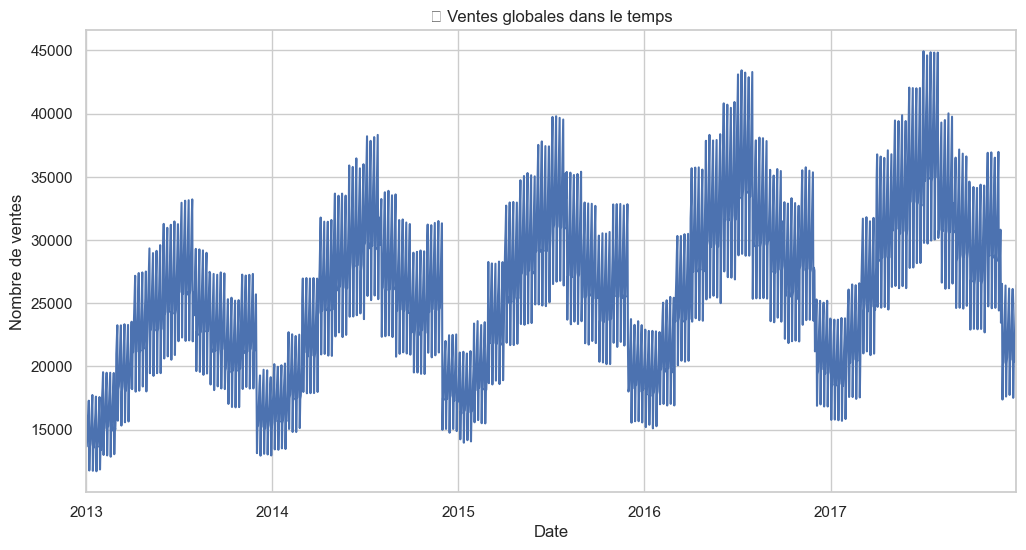

c:\Users\baayv\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


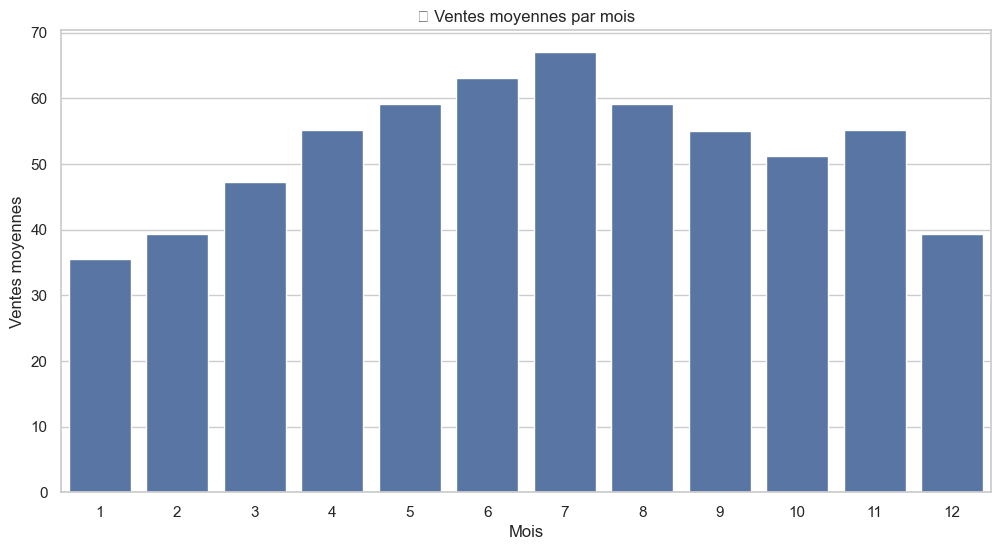

c:\Users\baayv\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


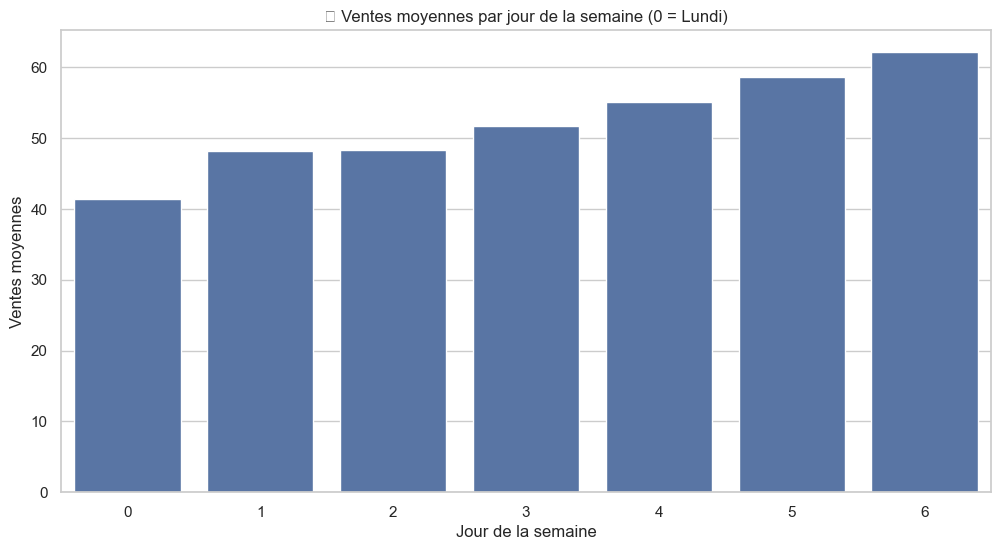

C:\Users\baayv\AppData\Local\Temp\ipykernel_15856\688969617.py:44: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from current font.
  plt.tight_layout()
C:\Users\baayv\AppData\Local\Temp\ipykernel_15856\688969617.py:44: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from current font.
  plt.tight_layout()
c:\Users\baayv\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\baayv\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


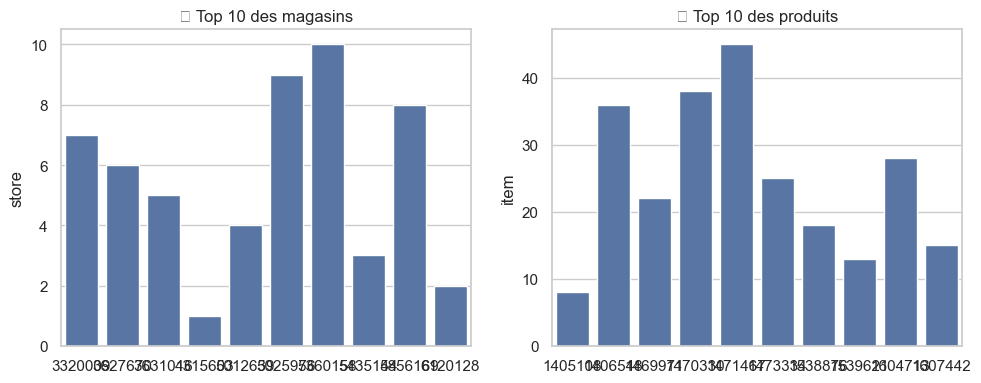

c:\Users\baayv\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


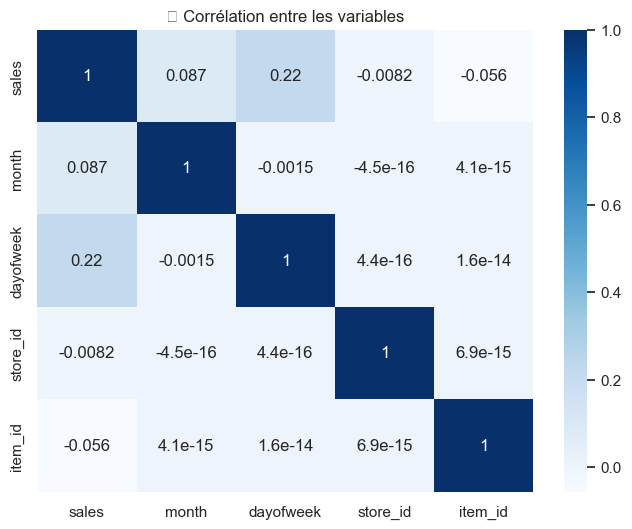

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Changer le style des graphiques
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 1. Évolution des ventes globales dans le temps
sales_by_date = df.groupby('date')['sales'].sum()
sales_by_date.plot(title="📈 Ventes globales dans le temps")
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

# 2. Ventes moyennes par mois
monthly_sales = df.groupby('month')['sales'].mean()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("📊 Ventes moyennes par mois")
plt.xlabel("Mois")
plt.ylabel("Ventes moyennes")
plt.show()

# 3. Ventes moyennes par jour de la semaine
dow_sales = df.groupby('dayofweek')['sales'].mean()
sns.barplot(x=dow_sales.index, y=dow_sales.values)
plt.title("📅 Ventes moyennes par jour de la semaine (0 = Lundi)")
plt.xlabel("Jour de la semaine")
plt.ylabel("Ventes moyennes")
plt.show()

# 4. Top 10 des stores et des items (en ventes totales)
top_stores = df.groupby('store')['sales'].sum().sort_values(ascending=False).head(10)
top_items = df.groupby('item')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(y=top_stores.index, x=top_stores.values)
plt.title("🏬 Top 10 des magasins")

plt.subplot(1,2,2)
sns.barplot(y=top_items.index, x=top_items.values)
plt.title("🛒 Top 10 des produits")

plt.tight_layout()
plt.show()

# 5. (Optionnel) Heatmap de corrélation
plt.figure(figsize=(8,6))
sns.heatmap(df[['sales', 'month', 'dayofweek', 'store_id', 'item_id']].corr(), annot=True, cmap="Blues")
plt.title("🔍 Corrélation entre les variables")
plt.show()


### Étape 5 — Modélisation prédictive (Machine Learning)

In [6]:
df['store_id'] = df['store'].astype('category').cat.codes
df['item_id'] = df['item'].astype('category').cat.codes


In [7]:
from sklearn.model_selection import train_test_split

# Features (X) et cible (y)
X = df[['store_id', 'item_id', 'month', 'dayofweek']]
y = df['sales']

# Séparation en 80% entraînement, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Régression Linéaire - MAE : {mae:.2f} | RMSE : {rmse:.2f}")


Régression Linéaire - MAE : 22.45 | RMSE : 27.89


In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest - MAE : {mae_rf:.2f} | RMSE : {rmse_rf:.2f}")


Random Forest - MAE : 7.41 | RMSE : 9.78


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import numpy as np

# 1. Charger les données
df = pd.read_csv("train.csv")

# 2. Préparer les features et la target
X = df.drop(columns=["sales"])  # tes colonnes : date, store, item
y = df["sales"]

# Facultatif : transformer les colonnes de type date en features numériques si ce n’est pas déjà fait
X["date"] = pd.to_datetime(X["date"])
X["year"] = X["date"].dt.year
X["month"] = X["date"].dt.month
X["day"] = X["date"].dt.day
X["dayofweek"] = X["date"].dt.dayofweek
X = X.drop(columns=["date"])

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entraîner le modèle Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# 5. Évaluer le modèle
y_pred = model_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ Random Forest - MAE : {mae:.2f} | RMSE : {rmse:.2f}")

# 6. Sauvegarder le modèle avec joblib
joblib.dump(model_rf, "random_forest_model.pkl")
print("✅ Modèle sauvegardé sous 'random_forest_model.pkl'")


✅ Random Forest - MAE : 6.26 | RMSE : 8.15
✅ Modèle sauvegardé sous 'random_forest_model.pkl'


### Étape 6 — Data Storytelling et Visualisations Interactives

APP.py